In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math

In [3]:
df = pd.read_csv("3 Des 2019 Proximity.csv")
df

,prox1,prox2,prox3,prox4,prox5,prox6,prox7,prox8,prox9,prox10,...,prox48,prox49,prox50,prox51,prox52,prox53,prox54,prox55,prox56,prox57
0,0.000000,0.396491,0.347826,0.414474,0.385892,0.373077,0.392857,0.413559,0.405797,0.357488,...,0.542601,0.467249,0.555556,0.400749,0.404297,0.405622,0.401786,0.410628,0.423221,0.490654
1,0.396491,0.000000,0.389474,0.559210,0.543860,0.550877,0.659649,0.715254,0.442105,0.459649,...,0.452632,0.414035,0.343860,0.568421,0.552734,0.556225,0.546875,0.375439,0.628070,0.515789
2,0.347826,0.389474,0.000000,0.292763,0.365145,0.323077,0.371429,0.366102,0.311558,0.347826,...,0.309417,0.310044,0.343915,0.359551,0.306641,0.305221,0.294643,0.326087,0.385768,0.383178
3,0.414474,0.559210,0.292763,0.000000,0.536184,0.526316,0.585526,0.601974,0.388158,0.404605,...,0.444079,0.509868,0.407895,0.500000,0.591797,0.594378,0.611607,0.388158,0.569079,0.394737
4,0.385892,0.543860,0.365145,0.536184,0.000000,0.623077,0.575000,0.579661,0.460581,0.497925,...,0.485477,0.510373,0.402490,0.520599,0.466797,0.469880,0.466518,0.439834,0.554307,0.468880
5,0.373077,0.550877,0.323077,0.526316,0.623077,0.000000,0.596429,0.569492,0.442308,0.465385,...,0.511538,0.465385,0.430769,0.561798,0.507812,0.508032,0.497768,0.388461,0.573034,0.476923
6,0.392857,0.659649,0.371429,0.585526,0.575000,0.596429,0.000000,0.664407,0.467857,0.467857,...,0.532143,0.453571,0.407143,0.546429,0.546875,0.554217,0.562500,0.421429,0.839286,0.517857
7,0.413559,0.715254,0.366102,0.601974,0.579661,0.569492,0.664407,0.000000,0.430509,0.464407,...,0.508475,0.406780,0.328814,0.569492,0.572266,0.578313,0.580357,0.389830,0.647458,0.549153
8,0.405797,0.442105,0.311558,0.388158,0.460581,0.442308,0.467857,0.430509,0.000000,0.685990,...,0.448431,0.366812,0.396985,0.348315,0.384766,0.395582,0.379464,0.361809,0.498127,0.439252
9,0.357488,0.459649,0.347826,0.404605,0.497925,0.465385,0.467857,0.464407,0.685990,0.000000,...,0.417040,0.375546,0.357488,0.419476,0.402344,0.409639,0.401786,0.357488,0.471910,0.457944


In [4]:
labl = pd.read_csv("3 Des 2019 Data Lengkap.csv")
labl

,code,shortname,gname,Density,Centrality,RCA
0,K010201,Kemiskinan,01_Kemiskinan,0.709547,21.875870,1
1,K010401A,Lahir Faskes (B40),01_Lahir Faskes (B40),0.694949,26.852580,1
2,K010401F,RT Kumuh Kota (B40),01_RT Kumuh Kota (B40),0.696184,17.924330,1
3,K010401G,APM SD (B40),01_APM SD (B40),0.685757,25.138220,1
4,K010401H,APM SMP (B40),01_APM SMP (B40),0.698444,25.337740,1
5,K010401I,APM SMA (B40),01_APM SMA (B40),0.720614,25.751290,-1
6,K010401J,Akta Lahir (B40),01_Akta Lahir (B40),0.712859,27.094860,-1
7,K010401K,Listrik (B40),01_Listrik (B40),0.702120,27.155630,1
8,K020101A,Underweight,02_Underweight,0.688811,21.988190,1
9,K020201,Stunting,02_Stunting,0.696369,22.719940,1


In [5]:
A = nx.Graph()
A
A.nodes(), A.edges()

(NodeView(()), EdgeView([]))

In [6]:
for i in range(0, 57):
    for j in range(i+1, 57):
        A.add_edge(labl.iloc[i][2],labl.iloc[j][2], weight = df.iloc[i][j])
        
print(A.edges())
len(A.edges())

[('01_Kemiskinan', '01_Lahir Faskes (B40)'), ('01_Kemiskinan', '01_RT Kumuh Kota (B40)'), ('01_Kemiskinan', '01_APM SD (B40)'), ('01_Kemiskinan', '01_APM SMP (B40)'), ('01_Kemiskinan', '01_APM SMA (B40)'), ('01_Kemiskinan', '01_Akta Lahir (B40)'), ('01_Kemiskinan', '01_Listrik (B40)'), ('01_Kemiskinan', '02_Underweight'), ('01_Kemiskinan', '02_Stunting'), ('01_Kemiskinan', '02_Wasting'), ('01_Kemiskinan', '02_Gemuk'), ('01_Kemiskinan', '03_Lahir Tenkes'), ('01_Kemiskinan', '03_Lahir Faskes'), ('01_Kemiskinan', '03_Unmet need kesehatan'), ('01_Kemiskinan', '03_Asuransi'), ('01_Kemiskinan', '03_Merokok'), ('01_Kemiskinan', '04_APK SD'), ('01_Kemiskinan', '04_APK SMP'), ('01_Kemiskinan', '04_APK SMA'), ('01_Kemiskinan', '04_Rata2 Lama Sekolah'), ('01_Kemiskinan', '04_APK PAUD'), ('01_Kemiskinan', '04_APK PT'), ('01_Kemiskinan', '04_Remaja TIK'), ('01_Kemiskinan', '04_Dewasa TIK'), ('01_Kemiskinan', '04_APM SD (P/L)'), ('01_Kemiskinan', '04_APM SMP (P/L)'), ('01_Kemiskinan', '04_APM  SMA (

1596

In [7]:
# node size based on density
nd1 = list(range(57))
for index in range(57):
    nd1[index] = labl.iloc[index][3]
print(nd1)

Sum_n_dens = sum(nd1) 
print(Sum_n_dens) 

norm_dens = list(range(57))
for index in range(57):
    norm_dens[index] = nd1[index]/Sum_n_dens
print(norm_dens)
print(sum(norm_dens))

[0.7095467, 0.6949486999999999, 0.6961843000000001, 0.6857566999999999, 0.6984435999999999, 0.7206143, 0.7128591999999999, 0.7021199, 0.6888114000000001, 0.6963691999999999, 0.7160025999999999, 0.6949618000000001, 0.7206981, 0.6935759, 0.7091141, 0.7041286, 0.7061723000000001, 0.7071143, 0.6985420999999999, 0.6967691999999999, 0.7081165, 0.7184861, 0.7068201, 0.7090204000000001, 0.7227464, 0.6892155, 0.6662357, 0.6796962, 0.6971991, 0.7249364, 0.6974355999999999, 0.6897255999999999, 0.6971958, 0.7230479999999999, 0.7008873999999999, 0.7034212, 0.7022845, 0.7191803000000001, 0.7115185, 0.7191826, 0.7297861999999999, 0.7223050999999999, 0.7299216, 0.7196643, 0.6974469, 0.7164471, 0.700282, 0.718439, 0.7117277, 0.7011165, 0.7085007, 0.7035633000000001, 0.7040001, 0.7034446, 0.6879721999999999, 0.7139035, 0.7260613]
40.23366699999999
[0.01763564578888621, 0.01727281532652741, 0.017303525925190966, 0.017044349947023224, 0.01735968038906322, 0.017910728843085574, 0.01771797733475301, 0.01745

In [8]:
# node size based on centrality
nd2 = list(range(57))
for index in range(57):
    nd2[index] = labl.iloc[index][4]
print(nd2)

[21.875870000000003, 26.85258, 17.924329999999998, 25.13822, 25.33774, 25.75129, 27.094859999999997, 27.15563, 21.98819, 22.71994, 21.68666, 20.709989999999998, 27.087629999999997, 27.024790000000003, 22.38897, 22.96347, 20.47985, 21.46356, 23.460910000000002, 24.57684, 24.44135, 23.142889999999998, 23.80085, 26.67107, 25.975270000000002, 11.34229, 7.47616, 6.610192999999999, 11.572339999999999, 25.29385, 26.17892, 26.088620000000002, 25.68122, 20.962979999999998, 22.19064, 26.358459999999997, 26.39552, 25.56974, 19.88739, 25.48331, 20.52028, 24.66605, 15.44135, 20.36228, 20.06028, 22.538829999999997, 23.87244, 25.16704, 22.357670000000002, 21.169970000000003, 25.71999, 25.76172, 25.96875, 25.91512, 19.67342, 26.87378, 25.324720000000003]


In [10]:
# node color based on RCA
nd3 = list(range(57))
warna_node_rca = list(range(59))
for index in range(57):
    nd3[index] = labl.iloc[index][5]
    if nd3[index] == 0 :
        warna_node_rca[index] = 'yellow'
#        print("yellow")
    elif nd3[index] == 1 :
        warna_node_rca[index] = 'green'
#        print("green")
    else:
        warna_node_rca[index] = 'red'
#        print("red")
print(nd3)
print(warna_node_rca)
W = [warna_node_rca[index] for index in range(57)]
print(W)

[1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 0, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, -1, 1, -1, -1, 0, 1, 1, 1, 0, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1]
['green', 'green', 'green', 'green', 'green', 'red', 'red', 'green', 'green', 'green', 'red', 'green', 'yellow', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'green', 'yellow', 'green', 'green', 'green', 'red', 'green', 'red', 'red', 'yellow', 'green', 'green', 'green', 'yellow', 'red', 'green', 'green', 'red', 'green', 'red', 'green', 'green', 'red', 'green', 'red', 'green', 'green', 'green', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'green', 57, 58]
['green', 'green', 'green', 'green', 'green', 'red', 'red', 'green', 'green', 'green', 'red', 'green', 'yellow', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'green', 'yellow', 'green', 'green', 'green', 'red', 'green', 'red', 'red', 'yellow', 'green', 'green', 'green', 'yellow', 'red', 'green', 'gr

[212.86400999999998, 208.48460999999995, 208.85529000000002, 205.72700999999998, 209.53307999999998, 216.18429, 213.85775999999998, 210.63597000000001, 206.64342000000002, 208.91075999999998, 214.80077999999997, 208.48854000000003, 216.20943, 208.07277000000002, 212.73423, 211.23857999999998, 211.85169000000002, 212.13429, 209.56262999999998, 209.03075999999996, 212.43495000000001, 215.54583, 212.04602999999997, 212.70612000000003, 216.82392000000002, 206.76465, 199.87071, 203.90886, 209.15973, 217.48092, 209.23067999999998, 206.91768, 209.15874000000002, 216.91439999999997, 210.26621999999998, 211.02635999999998, 210.68535, 215.75409000000002, 213.45555000000002, 215.75478, 218.93586, 216.69152999999997, 218.97647999999998, 215.89929, 209.23407, 214.93413, 210.0846, 215.5317, 213.51830999999999, 210.33495000000002, 212.55021, 211.06899000000004, 211.20003, 211.03338, 206.39165999999997, 214.17105, 217.81839]


{'01_Kemiskinan': Text(-0.7040464582422276, 0.4384581924125549, '01_Kemiskinan'),
 '01_Lahir Faskes (B40)': Text(-0.0469411175138716, -0.046074047983287535, '01_Lahir Faskes (B40)'),
 '01_RT Kumuh Kota (B40)': Text(0.9714514511658119, 0.08676875589807413, '01_RT Kumuh Kota (B40)'),
 '01_APM SD (B40)': Text(-0.30238648308916743, 0.0808110342234811, '01_APM SD (B40)'),
 '01_APM SMP (B40)': Text(0.251054165125514, 0.3903172898808115, '01_APM SMP (B40)'),
 '01_APM SMA (B40)': Text(0.2585845809631402, 0.2469802183928857, '01_APM SMA (B40)'),
 '01_Akta Lahir (B40)': Text(-0.10690354748983709, -0.18838122227677342, '01_Akta Lahir (B40)'),
 '01_Listrik (B40)': Text(-0.18769032621450205, -0.12637368852594583, '01_Listrik (B40)'),
 '02_Underweight': Text(0.6144964436772602, 0.31098176183428017, '02_Underweight'),
 '02_Stunting': Text(0.5239983107796795, 0.16938783853398431, '02_Stunting'),
 '02_Wasting': Text(0.6671571220603925, 0.44547325719926, '02_Wasting'),
 '02_Gemuk': Text(0.52596425206020

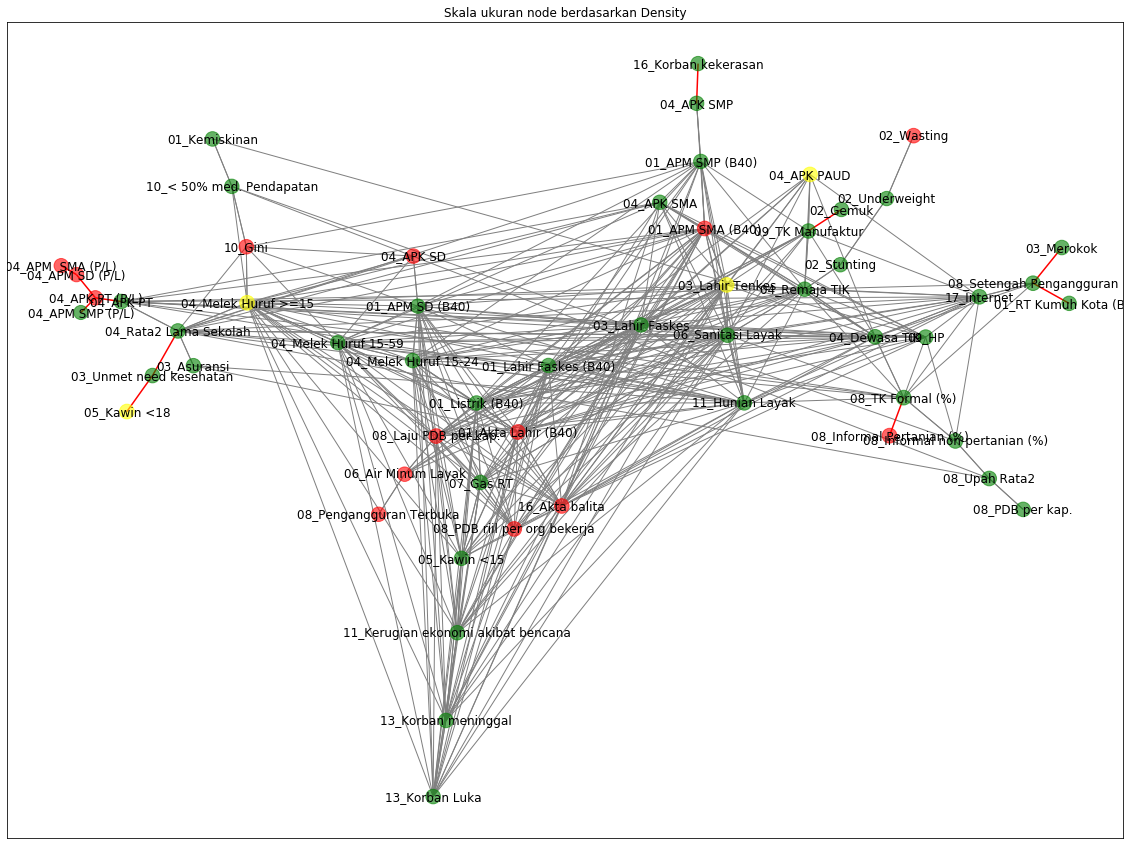

In [13]:
# from networkx.algorithms import tree
# metode kruskal

plt.subplots(figsize=(20,15))
plt.title('Skala ukuran node berdasarkan Density')
elargeA = [(u, v) for (u, v, d) in A.edges(data=True) if d['weight'] >= 0.5]
esmallA = [(u, v) for (u, v, d) in A.edges(data=True) if d['weight'] < 0.5]

T = nx.maximum_spanning_tree(A,weight='weight', algorithm='kruskal')

elargeT = [(u, v) for (u, v, d) in T.edges(data=True) if d['weight'] >= 0.5]
esmallT = [(u, v) for (u, v, d) in T.edges(data=True) if d['weight'] < 0.5]

# Ukuran vertex berdasarkan Density
D = [(nd1[index])*300 for index in range(57)]
print(D)

# Warna node: RCA
W = [warna_node_rca[index] for index in range(57)]

type(A)

edgelist = list(T)
sorted(T.edges(data=True))
pos = nx.kamada_kawai_layout(T)
nx.draw_networkx_nodes(T,pos, alpha=0.6,node_color= W,node_size=D)
nx.draw_networkx_edges(A,pos, edgelist = elargeA, width=1, edge_color='grey')
nx.draw_networkx_edges(T,pos, edgelist = elargeT, width=1, edge_color='grey')
nx.draw_networkx_edges(T,pos, edgelist = esmallT, width=1.5, edge_color='red')
nx.draw_networkx_labels(T,pos)

[437.51740000000007, 537.0516, 358.48659999999995, 502.7644, 506.7548, 515.0258, 541.8971999999999, 543.1125999999999, 439.7638, 454.39880000000005, 433.7332, 414.1998, 541.7525999999999, 540.4958, 447.7794, 459.2694, 409.597, 429.2712, 469.2182, 491.5368, 488.827, 462.85779999999994, 476.017, 533.4214, 519.5054, 226.8458, 149.5232, 132.20385999999996, 231.44679999999997, 505.87699999999995, 523.5784, 521.7724000000001, 513.6244, 419.2596, 443.8128, 527.1691999999999, 527.9104, 511.3948, 397.7478, 509.6662, 410.4056, 493.32099999999997, 308.827, 407.24559999999997, 401.2056, 450.7765999999999, 477.4488, 503.3408, 447.15340000000003, 423.39940000000007, 514.3998, 515.2344, 519.375, 518.3024, 393.4684, 537.4756, 506.49440000000004]


{'01_Kemiskinan': Text(-0.7040464582422276, 0.4384581924125549, '01_Kemiskinan'),
 '01_Lahir Faskes (B40)': Text(-0.0469411175138716, -0.046074047983287535, '01_Lahir Faskes (B40)'),
 '01_RT Kumuh Kota (B40)': Text(0.9714514511658119, 0.08676875589807413, '01_RT Kumuh Kota (B40)'),
 '01_APM SD (B40)': Text(-0.30238648308916743, 0.0808110342234811, '01_APM SD (B40)'),
 '01_APM SMP (B40)': Text(0.251054165125514, 0.3903172898808115, '01_APM SMP (B40)'),
 '01_APM SMA (B40)': Text(0.2585845809631402, 0.2469802183928857, '01_APM SMA (B40)'),
 '01_Akta Lahir (B40)': Text(-0.10690354748983709, -0.18838122227677342, '01_Akta Lahir (B40)'),
 '01_Listrik (B40)': Text(-0.18769032621450205, -0.12637368852594583, '01_Listrik (B40)'),
 '02_Underweight': Text(0.6144964436772602, 0.31098176183428017, '02_Underweight'),
 '02_Stunting': Text(0.5239983107796795, 0.16938783853398431, '02_Stunting'),
 '02_Wasting': Text(0.6671571220603925, 0.44547325719926, '02_Wasting'),
 '02_Gemuk': Text(0.52596425206020

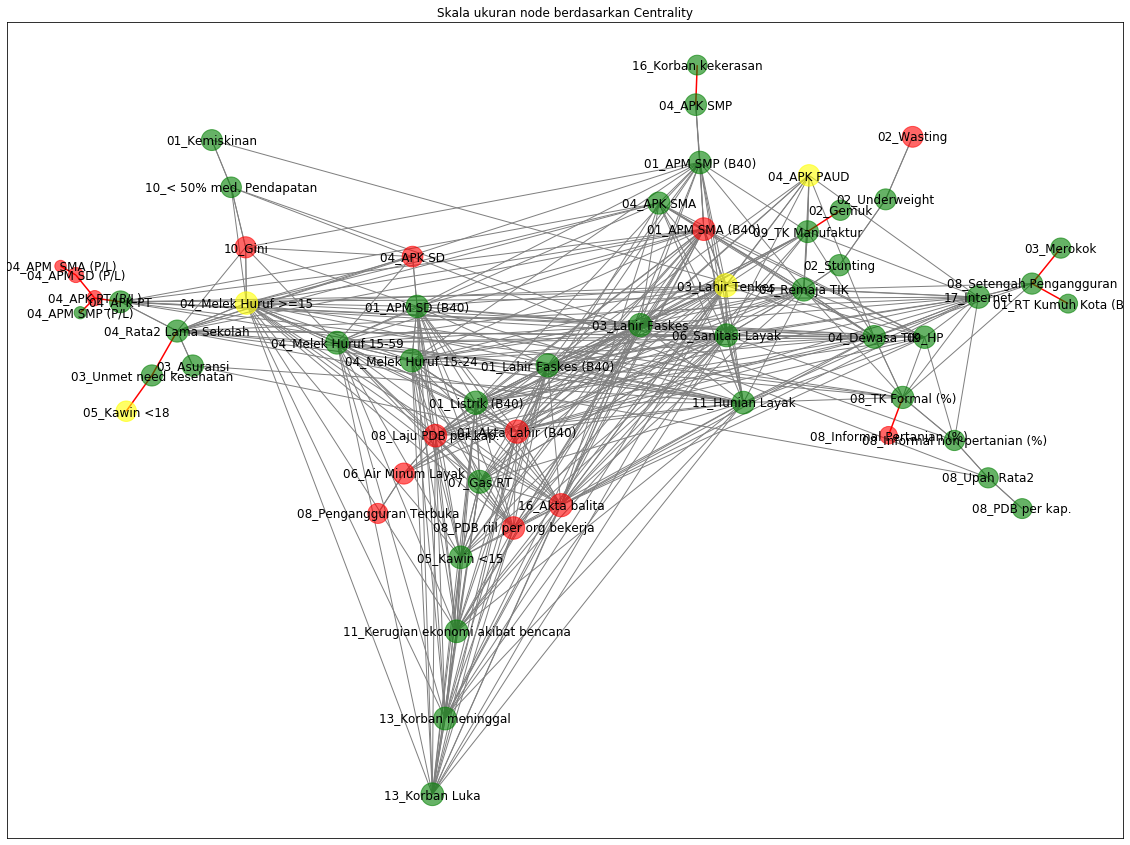

In [14]:
# from networkx.algorithms import tree
# metode kruskal

plt.subplots(figsize=(20,15))
plt.title('Skala ukuran node berdasarkan Centrality')
elargeA = [(u, v) for (u, v, d) in A.edges(data=True) if d['weight'] >= 0.5]
esmallA = [(u, v) for (u, v, d) in A.edges(data=True) if d['weight'] < 0.5]

T = nx.maximum_spanning_tree(A,weight='weight', algorithm='kruskal')

elargeT = [(u, v) for (u, v, d) in T.edges(data=True) if d['weight'] >= 0.5]
esmallT = [(u, v) for (u, v, d) in T.edges(data=True) if d['weight'] < 0.5]

# Ukuran vertex berdasarkan Centrality
D_c = [(nd2[index])*20 for index in range(57)]
print(D_c)

# Warna node: RCA
W = [warna_node_rca[index] for index in range(57)]

type(A)

# bagi edge menjadi diatas dan dibawah treshold
# coba normalisasi ukuran vertex
# verteks di tambahkan identitas goals
# warna vertex berdasarkan RCA

edgelist = list(T)
sorted(T.edges(data=True))
pos = nx.kamada_kawai_layout(T)
nx.draw_networkx_edges(A,pos, edgelist = elargeA, width=1, edge_color='grey')
nx.draw_networkx_nodes(T,pos, alpha=0.6,node_color= W,node_size=D_c)
nx.draw_networkx_edges(T,pos, edgelist = elargeT, width=1, edge_color='grey')
nx.draw_networkx_edges(T,pos, edgelist = esmallT, width=1.5, edge_color='red')
nx.draw_networkx_labels(T,pos)